## Mini Project III

***Task I***:
* create two separate customer segmentations (using clustering) to split them into 3-5 clusters:
    * based on demographics (only on the information from twm_customer)
    * based on their banking behavior. 
        do they have savings account? How much do they save?
        do they have credit account? How much do they live in debt?
        are they making lot of small transactions or few huge ones?

In [577]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import seaborn as sns

### Demographics Cluster

In [ ]:
df_customers = pd.read_csv("C:\Users\bevli\Downloads\mini-project-III\twm_customer.csv", sep = ';')
df_customers.head()

In [ ]:
df_customers.describe()


In [ ]:
#check for null values
df_customers.isna().sum()

: 

In [ ]:
#Convert marital status to categorical variable
df_customers['marital_status']=df_customers['marital_status'].astype('category')
df_customers

In [ ]:
#columns for creating dummy variable
encode = pd.get_dummies(df_customers[['income','age','years_with_bank','nbr_children','gender','marital_status']])
encode

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#perform scaling on datafram
encode_scaled = MinMaxScaler().fit_transform(encode)
encode_scaled = pd.DataFrame(encode_scaled, columns = encode.columns)
encode_scaled

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#elbow rule
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    randomstate=0)
        km.fit(X)
        distortions.append(km.inertia)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [ ]:
plot_distortion(encode_scaled)


In [ ]:
#number of clusters to be taken as 4

encode_scaled['clusters']= KMeans(n_clusters=4,
            init = 'k-means++' # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0).fit_predict(encode_scaled)

encode_scaled

In [ ]:
#radar chart data
df_radar = encode_scaled.groupby('clusters').mean().divide(encode_scaled.drop('clusters',axis=1).mean())*100
df_radar

In [ ]:
#Radar Chart
# function that plots radar chart
def plot_radarchart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster{df.index[i]}',
                                    fill = 'toself'))


    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [ ]:
plot_radar_chart(df_radar)


In [ ]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

#fit pca model to dataframe
principalcomponents = pca.fit_transform(encode_scaled)

#transfrom data onto first two principal components
principalDf = pd.DataFrame(data = principalcomponents, columns = ['principal components 1','principal component 2'])

#assign clusters
principalDf['clusters']=encode_scaled['clusters']

principalDf

In [ ]:
total_var = pca.explained_varianceratio.sum() * 100

#plot principal components and clusters
import plotly.express as px

fig = px.scatter(principalcomponents,x=0, y=1,color = principalDf.clusters ,
                        title = f'Total Explained Variance: {total_var:.2f}%')
fig.show()

### A.Banking Behavior Cluster

In [578]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Account- Saving Account

In [579]:
df_saving=pd.read_csv('data/twm_savings_acct.csv',sep=';')
df_saving.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [580]:
#saving amount
df_saving['saving_amount']=df_saving['ending_balance']-df_saving['starting_balance']

In [581]:
df_saving.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,saving_amount
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,890.33


In [584]:
#extracting useful features
selected_cols=['cust_id', 'account_active','saving_amount']
saving_account=pd.DataFrame(df_saving[selected_cols])
saving_account.fillna(0)

,cust_id,account_active,saving_amount
0,1363160,Y,9.50
1,1362487,N,-638.84
2,1362548,Y,3.78
3,1362752,Y,9.07
4,1363017,N,890.33
...,...,...,...
416,1363141,Y,351.24
417,1363038,Y,174.73
418,1362529,Y,211.08
419,1362895,Y,-73.71


In [587]:
saving_account.head()

,cust_id,account_active,saving_amount
0,1363160,Y,9.50
1,1362487,N,-638.84
2,1362548,Y,3.78
3,1362752,Y,9.07
4,1363017,N,890.33


In [588]:
saving_account.isnull().sum()

cust_id           0
account_active    0
saving_amount     0
dtype: int64

### Account- Credit Account

In [589]:
df=pd.read_csv('data/twm_credit_acct.csv',sep=';')
df.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [590]:
df['debt_owned']=df['ending_balance'] - df['starting_balance']
selected_cols=['cust_id', 'account_active','debt_owned']
credit_account=pd.DataFrame(df[selected_cols])
credit_account.head()

,cust_id,account_active,debt_owned
0,1363160,Y,-370.77
1,1362487,Y,1548.23
2,1362548,Y,-6896.57
3,1362752,N,-2302.14
4,1363017,Y,1000.00


### Account- Merge

In [591]:
banking_account=pd.merge(saving_account,credit_account, on='cust_id', how='left').fillna(0)


In [328]:
banking_account.rename(columns={'account_active_x':'saving active',
                                'account_active_y':'creditcard Active'
    
    
    
})

,cust_id,saving active,saving_amount,creditcard Active,debt_owned
0,1363160,Y,9.50,Y,-370.77
1,1362487,N,-638.84,Y,1548.23
2,1362548,Y,3.78,Y,-6896.57
3,1362752,Y,9.07,N,-2302.14
4,1363017,N,890.33,Y,1000.00
...,...,...,...,...,...
416,1363141,Y,351.24,0,0.00
417,1363038,Y,174.73,Y,1800.00
418,1362529,Y,211.08,N,-1048.21
419,1362895,Y,-73.71,Y,1300.00


In [593]:
banking_account.isnull().sum()

cust_id             0
account_active_x    0
saving_amount       0
account_active_y    0
debt_owned          0
dtype: int64

##  Account Transaction- saving account

In [594]:
#saving account
df=pd.read_csv('data/twm_savings_tran.csv',sep=';')
df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [596]:
df.describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,1.118900e+04,11189.000000,11189.000000,11189.000000,11189.000000,11189.000000
mean,1.362988e+06,16.113504,14.458362,13.628621,0.829741,1229.467968
std,2.979129e+02,11.024730,221.971173,222.003741,2.856393,2256.670395
min,1.362480e+06,1.000000,-2495.880000,-2495.880000,0.000000,0.070000
25%,1.362720e+06,7.000000,-0.750000,-0.750000,0.000000,238.480000
50%,1.362978e+06,14.000000,0.390000,0.000000,0.000000,562.040000
75%,1.363262e+06,23.000000,7.340000,0.000000,0.480000,1247.300000
max,1.363495e+06,62.000000,4478.610000,4478.610000,44.680000,26016.690000


In [595]:
selected_cols=['cust_id','tran_amt','principal_amt','interest_amt','new_balance','tran_id']
saving=pd.DataFrame(df[selected_cols])
saving.shape

(11189, 6)

In [344]:
saving.groupby('cust_id').agg({'tran_amt':'sum','tran_id':'count'}).reset_index()

,cust_id,tran_amt,tran_id
0,1362480,482.32,26
1,1362484,1929.66,33
2,1362486,-168.24,25
3,1362487,-638.84,19
4,1362489,-386.59,22
...,...,...,...
415,1363490,34.24,12
416,1363491,-187.63,18
417,1363492,164.08,25
418,1363493,222.43,19


##  Account Transaction- credit card


In [597]:
#credit card
df=pd.read_csv('data/twm_credit_tran.csv',sep=';')
df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [598]:
selected_cols=['cust_id','tran_amt','principal_amt','interest_amt','new_balance','tran_id']
credit=pd.DataFrame(df[selected_cols])


In [599]:
credit_transaction=credit.groupby('cust_id').agg({'tran_amt':'sum','tran_id':'count'}).reset_index()

In [601]:
credit_transaction.isnull().sum()

cust_id     0
tran_amt    0
tran_id     0
dtype: int64

##  Account Transaction- Merge

In [602]:
#merge transaction
merged_transaction=pd.merge(saving_transactions,credit_transaction,on='cust_id')

In [603]:
transaction=merged_transaction.rename(columns={
                    'tran_amt_x_x':'saving transaction',
                    'tran_amt_x_y': 'credit transaction',
                    'tran_amt_y_x':'saving transaction number',
                    'tran_amt_y_y':'credit card transaction number'}
                         )


In [604]:
transaction.head()

,cust_id,tran_amt_x,tran_amt_y,tran_amt,tran_id
0,1362480,482.32,17,1948.66,32
1,1362484,1929.66,31,923.87,55
2,1362487,-638.84,14,-1535.59,32
3,1362489,-386.59,14,1694.18,35
4,1362508,133.47,28,-179.90,87


In [606]:
transaction.isnull().sum()

cust_id       0
tran_amt_x    0
tran_amt_y    0
tran_amt      0
tran_id       0
dtype: int64

In [607]:
final=pd.merge(banking_account,transaction, on='cust_id',how='left')
banking_beh=final.rename(columns={'account_active_x':'saving account_active',
                     'account_active_y':'credit card activate'})


In [608]:
#delete nan value
banking_beh.dropna(how='any',inplace= True)
# banking_beh[banking_beh.isna().any(axis=1)]
banking_beh.isnull().sum()

cust_id                  0
saving account_active    0
saving_amount            0
credit card activate     0
debt_owned               0
tran_amt_x               0
tran_amt_y               0
tran_amt                 0
tran_id                  0
dtype: int64

In [609]:
banking_beh['saving account_active']=banking_beh['saving account_active'].replace({'Y ':1, 'N ':0})
banking_beh['credit card activate']=banking_beh['credit card activate'].replace({'Y ':1, 'N ':0})

In [610]:
banking_beh

,cust_id,saving account_active,saving_amount,credit card activate,debt_owned,tran_amt_x,tran_amt_y,tran_amt,tran_id
0,1363160,1,9.50,1,-370.77,9.50,33.0,380.03,68.0
1,1362487,0,-638.84,1,1548.23,-638.84,14.0,-1535.59,32.0
2,1362548,1,3.78,1,-6896.57,3.78,2.0,6977.25,22.0
3,1362752,1,9.07,0,-2302.14,9.07,2.0,2406.65,15.0
4,1363017,0,890.33,1,1000.00,890.33,16.0,-956.10,63.0
...,...,...,...,...,...,...,...,...,...
414,1363284,1,-593.23,1,132.98,-592.60,23.0,-121.25,37.0
415,1362508,1,133.47,1,260.21,133.47,28.0,-179.90,87.0
417,1363038,1,174.73,1,1800.00,174.91,27.0,-1741.27,24.0
418,1362529,1,211.08,0,-1048.21,212.70,15.0,1361.31,39.0


In [613]:
# #get rid of non features
banking_beh.drop(columns=['cust_id'], inplace=True)


In [611]:
# new=banking_beh[(banking_beh['saving account_active']==1)&(banking_beh['credit card activate']==1)]
banking_beh.drop(columns=['saving account_active','credit card activate'], inplace=True)



In [614]:
banking_beh.head()

,saving_amount,debt_owned,tran_amt_x,tran_amt_y,tran_amt,tran_id
0,9.50,-370.77,9.50,33.0,380.03,68.0
1,-638.84,1548.23,-638.84,14.0,-1535.59,32.0
2,3.78,-6896.57,3.78,2.0,6977.25,22.0
3,9.07,-2302.14,9.07,2.0,2406.65,15.0
4,890.33,1000.00,890.33,16.0,-956.10,63.0


***Task II***:
* visualize the created clusters using radar charts and compare them agains each other


##  Account Behavioral Clustering

In [615]:
#SCALE:
scaler = StandardScaler()
banking=scaler.fit_transform(banking_beh)
#Mean=0;std=1


In [616]:
#elbow row

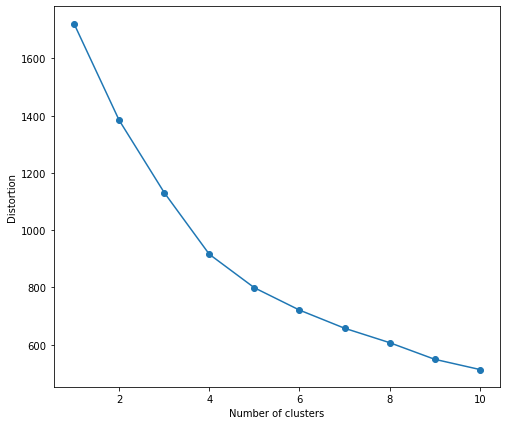

In [617]:
def plot_distortion(X, max_clusters=10):
    distortion=[]
    for i in range(1, max_clusters+1):
        km=KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)

        km.fit(X)
        distortion.append(km.inertia_)

    plt.plot(range(1,max_clusters+1), distortion, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_distortion(banking,max_clusters=10)


In [635]:
#instandtiate KMeans class
km=KMeans(n_clusters=3, init = 'k-means++', n_init=10,random_state=0)
y_km=km.fit_predict(banking)
#reconstruct dataFrame
banking_km=pd.DataFrame(banking, columns=list(new.columns))
banking_km['cluster']
banking_km.columns

Index(['saving_amount', 'debt_owned', 'saving transaction',
       'saving transaction number', 'credit transaction',
       'credit card transaction number'],
      dtype='object')

In [619]:
#Plot a Radar Chart:https://plotly.com/python/radar-chart/ 
def plot_radar(df):
    fig = go.Figure()
    
    for i in range(len(df)):
        fig.add_trace(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'Cluster {df.index[i]}',
                                    fill = 'toself'))    
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),showlegend = True)
    
    fig.show()




In [620]:
data=banking_km.groupby('cluster').mean()

In [621]:
plot_radar(data)


***Task III***:
* visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.


In [622]:
#implementing PCA
pca=PCA(n_components=2)
pca_banking=pca.fit_transform(banking)
print('Low-dimensional dataset shape: {}'.format(pca_banking.shape))

Low-dimensional dataset shape: (287, 2)


In [628]:
pca.components_

array([[ 0.53253204, -0.44889437,  0.53253754,  0.13774546,  0.45662476,
         0.06186483],
       [ 0.31863271,  0.47521177,  0.3186515 ,  0.47202095, -0.46728925,
         0.3604791 ]])

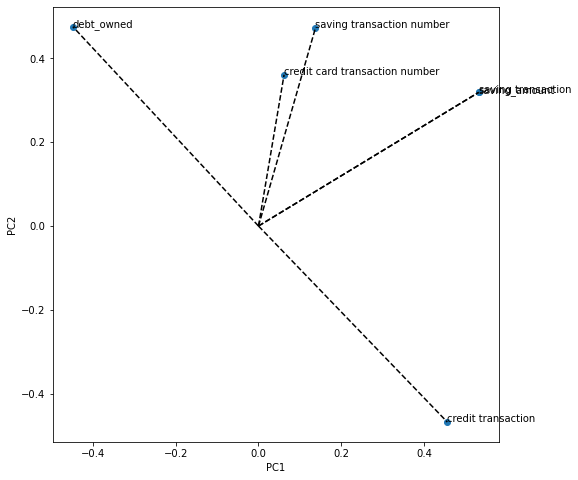

In [636]:
loading=pca.components_
x=loading[0]
y=loading[1]

# separations of the various wine classes
plt.figure(figsize=(8,8))
plt.scatter(x, y)
plt.xlabel("PC1")
plt.ylabel("PC2")
features=list(banking_km.columns)
for i, label in enumerate(features):
    plt.annotate(label, (x[i],y[i]))
    plt.plot([0,x[i]], [0, y[i]], color='black', ls='--')

plt.show()

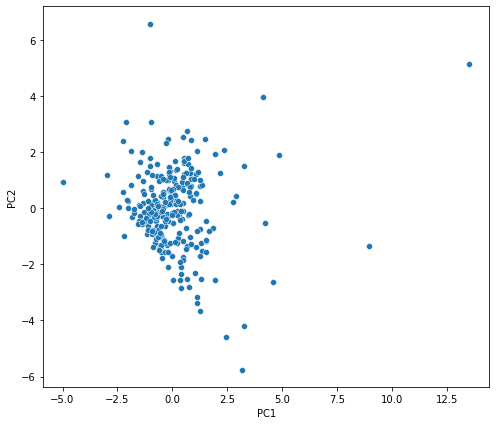

In [623]:
fig= sns.scatterplot(x=pca_banking[:,0], y=pca_banking[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [624]:
#reconstruct pca_banking
df_banking_km=pd.DataFrame(pca_banking,columns=['PC1', 'PC2'])
df_banking_km['cluster']=y_km
df_banking_km.head()

,PC1,PC2,cluster
0,0.033265,0.663934,0
1,-1.836446,-0.305002,1
2,2.422969,-4.577249,1
3,0.356415,-2.558051,1
4,0.081346,0.978089,0


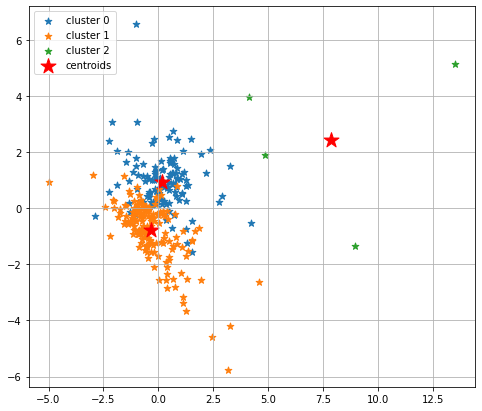

In [625]:
#plot clusters
def plot_clusters(X,y_res,plt_cluster_centers=False):
    Y_centroids=[]
    X_centroids=[]
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        #calculating the mean value of each cluster
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,y, s=50,marker='*', label=f'cluster {cluster}')


    if plt_cluster_centers:
        plt.scatter(X_centroids,Y_centroids,marker='*',c='red',s=250,label='centroids')


    plt.grid()
    plt.legend()
    plt.show()
plt.rcParams["figure.figsize"] = (8,7)
 # plot clustering result
plot_clusters(pca_banking, y_km, plt_cluster_centers= True)

***Task IV***:
* (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.
